<div>
Olá, Caio!

Meu nome é Luiz. Fico feliz em revisar seu projeto. Ao longo do texto farei algumas observações sobre melhorias no código e também farei comentários sobre suas percepções sobre o assunto. Estarei aberto a feedbacks e discussões sobre o tema.

**Peço que mantenha e não altere os comentários que eu fizer por aqui para que possamos nos localizar posteriormente, ok?**

Mais uma coisa, vamos utilizar um código de cores para você entender o meu feedback no seu notebook. Funciona assim:

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Sucesso. Tudo foi feito corretamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário do revisor: </b> <a class="tocSkip"></a>

Alerta não crítico, mas que pode ser corrigido para melhoria geral no seu código/análise.
</div>

<div class="alert alert-block alert-danger">

<b>Comentário do revisor: </b> <a class="tocSkip"></a>
    
Erro que precisa ser arrumado, caso contrário seu projeto **não** será aceito.
</div>

Você pode interagir comigo através dessa célula:
<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>
</div>




# Vamos encher o carrinho!

# Introdução

A Instacart é uma plataforma de entrega de supermercado onde os clientes podem fazer um pedido de supermercado e receber a compra em casa, semelhante ao funcionamento do Uber Eats e do iFood. O conjunto de dados que fornecemos a você foi modificado do original. Reduzimos o tamanho do conjunto de dados para que seus cálculos sejam executados mais rapidamente e introduzimos valores ausentes e duplicados. Também tivemos o cuidado de preservar as distribuições dos dados originais quando fizemos as alterações.

Você precisa completar três etapas. Para cada uma delas, escreva uma breve introdução descrevendo como você pretende concluir a etapa e justifique suas decisões em parágrafos explicativos intermédios a medida que você avança na solução. Escreva também uma conclusão para resumir suas conclusões e escolhas.



## Dicionário de dados

Há cinco tabelas no conjunto de dados, e você vai precisar usar todas elas para pré-processar os dados e fazer a AED. Abaixo está um dicionário que lista as colunas de cada tabela e descreve os dados contidos nelas.

- `instacart_orders.csv`: cada linha corresponde a um pedido no aplicativo da Instacart
    - `'order_id'`: é o número de identificação unívoco de cada pedido
    - `'user_id'`: é o número de identificação unívoco da conta de cada cliente
    - `'order_number'`: é o número de vezes que o cliente fez um pedido
    - `'order_dow'`: é o dia da semana em que o pedido foi feito (0 é domingo)
    - `'order_hour_of_day'`: é a hora do dia em que o pedido foi feito
    - `'days_since_prior_order'`: é o número de dias desde que o cliente fez seu pedido anterior




- `products.csv`: cada linha corresponde a um produto unívoco que os clientes podem comprar
    - `'product_id'`: é o número de identificação unívoco de cada produto
    - `'product_name'`: é o nome do produto
    - `'aisle_id'`: é o número de identificação unívoco de cada categoria de seção do supermercado
    - `'department_id'`: é o número de identificação unívoco de cada categoria de departamento do supermercado




-	`order_products.csv`: cada linha corresponde a um item incluído em um pedido
    -	`'order_id'`: é o número de identificação unívoco de cada pedido
    -	`'product_id'`: é o número de identificação unívoco de cada produto
    -	`'add_to_cart_order'`: é a ordem sequencial em que cada item foi colocado no carrinho
    -	`'reordered'`: 0 se o cliente nunca comprou o produto antes, 1 se já o comprou




-	`aisles.csv`
    -	`'aisle_id'`: é o número de identificação unívoco de cada categoria de seção do supermercado
    -	`'aisle'`: é o nome da seção



-	`departments.csv`
    -	`'department_id'`: é o número de identificação unívoco de cada categoria de departamento do supermercado
    -	`'department'`: é o nome do departamento


# Etapa 1. Visão geral dos dados

Leia os arquivos de dados (/datasets/instacart_orders.csv, /datasets/products.csv, /datasets/aisles.csv, /datasets/departments.csv e /datasets/order_products.csv) com `pd.read_csv()` usando os parâmetros apropriados para fazer isso corretamente. Verifique as informações para cada DataFrame criado.


## Plano de solução

Escreva aqui seu plano para a Etapa 2. Visão geral dos dados

In [2]:
# Importe as bibliotecas
import pandas as pd
import numpy as np
 

In [3]:
# leia os conjuntos de dados em DataFrames
df_orders = pd.read_csv('/datasets/instacart_orders.csv', sep=';')
df_products = pd.read_csv('/datasets/products.csv', sep=';')
df_aisles = pd.read_csv('/datasets/aisles.csv', sep=';')
df_departments = pd.read_csv('/datasets/departments.csv', sep=';')
df_order = pd.read_csv('/datasets/order_products.csv', sep=';') 

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
- O conjunto de dados foi carregado corretamente usando o separador `;`.
- O import das bibliotecas foi feito de forma correta e em uma célula separada.
</div>


In [4]:
# imprima as informações sobre o DataFrame
df_orders.info()
df_orders.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


In [5]:
# imprima as informações sobre o DataFrame
df_products.info()
df_products.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [6]:
# imprima as informações sobre o DataFrame
df_aisles.info()
df_aisles.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [7]:
# imprima as informações sobre o DataFrame
df_departments.info()
df_departments.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [8]:
# imprima as informações sobre o DataFrame
df_order.info()
df_order.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


## Conclusões

Escreva aqui suas conclusões intermediárias da Etapa 1. Visão geral dos dados

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
- O método `info()` foi utilizado para estudo inicial do conjunto de dados

</div>


<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
<s>Aqui você precisa usar o método `head()` para exibir uma amostra dos dados.</s>

</div>


# Etapa 2. Preparação de dados

Faça o pré-processamento dos dados da seguinte maneira:

-	Verifique e corrija os tipos de dados (por exemplo, certifique-se de que as colunas de ID sejam números inteiros)
-	Identifique e preencha valores ausentes
-	Identifique e remova valores duplicados

Certifique-se de explicar que tipos de valores ausentes e duplicados você encontrou, como você os preencheu ou removeu, por que escolheu esses métodos e por que você acha que esses valores ausentes e duplicados estavam presentes no conjunto de dados.

## Plano de solução

Escreva aqui seu plano para a Etapa 2. Preparação de dados

## Encontre e remova valores duplicados (e descreva por que você está fazendo suas escolhas)

### DataFrame `orders`

In [9]:
# Verificar se há pedidos duplicados
df_orders['order_id'].value_counts()

2125197    2
1782114    2
1286742    2
391768     2
1021560    2
          ..
1273706    1
689148     1
1752059    1
2794488    1
2047       1
Name: order_id, Length: 478952, dtype: int64

Há linhas duplicadas? Se sim, o que elas têm em comum?


In [10]:
# Com base nas suas conclusões,

# verifique todos os pedidos feitos às 2h da manhã nas quartas-feiras
df_orders[df_orders.duplicated()]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
<s>    
Aqui você precisa filtrar as linhas duplicadas. Referência: https://www.w3schools.com/python/pandas/ref_df_duplicated.asp
</s>
</div>


O que esse resultado quer dizer?

In [11]:
# Remova pedidos duplicados
df_orders['order_id'].drop_duplicates(inplace=True)

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
<s>
Aqui você precisa remover os duplicados atribuindo o resultado da operação a outra variável ou usar o argumento `inplace`. Referência: https://www.geeksforgeeks.org/python-pandas-dataframe-drop_duplicates/
</s>
</div>


In [12]:
# Verifique as linhas duplicadas mais uma vez
df_orders.value_counts()

order_id  user_id  order_number  order_dow  order_hour_of_day  days_since_prior_order
1021560   53767    3             3          2                  9.0                       2
467134    63189    21            3          2                  2.0                       2
391768    57671    19            3          2                  10.0                      2
2282673   86751    49            3          2                  2.0                       2
408114    68324    4             3          2                  18.0                      2
                                                                                        ..
1141863   88987    2             1          11                 14.0                      1
1141854   125458   91            6          8                  2.0                       1
1141847   156072   4             2          21                 6.0                       1
1141845   153218   2             3          8                  6.0                       1
3421

In [13]:
# Verifique novamente apenas os IDs de pedidos duplicados
df_orders['order_id'].value_counts()

2125197    2
1782114    2
1286742    2
391768     2
1021560    2
          ..
1273706    1
689148     1
1752059    1
2794488    1
2047       1
Name: order_id, Length: 478952, dtype: int64



Descreva brevemente suas conclusões e o que você fez com elas.

### DataFrame `products`

In [14]:
# Verifique se há linhas completamente duplicadas
df_products.duplicated().sum()

0

In [15]:
# Verifique apenas se há IDs de departamentos duplicados
df_products['department_id'].duplicated().sum()

49673

In [16]:
# Verifique apenas se há nomes de produtos duplicados (converta os nomes para minúsculas para uma comparação melhor)
df_products_lower = df_products['product_name'].str.lower()
df_products_lower.duplicated().sum()

1361

In [17]:
# Verifique os nomes de produtos duplicados que não estão faltando
df_products_lower.isnull().sum()

1258

Descreva brevemente suas conclusões e o que você fez com elas.

### DataFrame `departments`

In [18]:
# Verifique se há linhas completamente duplicadas
df_departments.duplicated().sum()

0

In [19]:
# Verifique apenas se há IDs dos produtos duplicados
df_departments['department_id'].duplicated().sum()

0

Descreva brevemente suas conclusões e o que você fez com elas.

### DataFrame `aisles`

In [20]:
# Verifique se há linhas completamente duplicadas
df_aisles.duplicated().sum()

0

In [21]:
# Verifique apenas se há IDs dos produtos duplicados
df_aisles['aisle_id'].duplicated().sum()

0

Descreva brevemente suas conclusões e o que você fez com elas.

### DataFrame `order_products`

In [22]:
# Verifique se há linhas completamente duplicadas
df_order.duplicated().sum()

0

In [23]:
# Verifique mais uma vez se há outros casos complicados de duplicados
df_order.duplicated().sum()

0

Descreva brevemente suas conclusões e o que você fez com elas.

## Encontre e remova valores ausentes


Ao processarmos valores duplicados, observamos que também temos valores ausentes que precisamos investigar nas seguintes colunas:

*	A coluna `'product_name'` da tabela products.
*	A coluna `'days_since_prior_order'` da tabela orders.
*	A coluna `'add_to_cart_order'` da tabela order_products.


### DataFrame `products`

In [24]:
# Encontre valores ausentes na coluna 'product_name'
df_products['product_name'].isna().sum()

1258

Descreva brevemente suas conclusões.

In [25]:
# Todos os nomes de produtos ausentes estão associados com a seção de ID 100?
df_products[df_products['aisle_id'] == 100] ['product_name'].isna().sum()

1258

Descreva brevemente suas conclusões. Resposta:SIM, TODOS ESTÃO ASSOCIADOS 

In [26]:
# Todos os nomes de produtos ausentes estão associados com o departamento de ID 21?
df_products[df_products['department_id'] == 21] ['product_name'].isna().sum()

1258

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
<s>Você precisa filtrar os dados pela seção 100 e departamento 21 para chegar à essa resposta.</s>

</div>


Todos os produtos presentes então presentes no departamneto de ID 21

Descreva brevemente suas conclusões.

In [27]:
# Use as tabelas de departamentos e seções para verificar os dados da seção ID 100 e do departamento ID 21.
df_products.groupby('department_id')['aisle_id'].count()

department_id
1     4008
2      548
3     1516
4     1684
5     1054
6     1139
7     4366
8      972
9     1858
10      38
11    6564
12     907
13    5372
14    1117
15    2092
16    3449
17    3085
18    1081
19    6264
20    1322
21    1258
Name: aisle_id, dtype: int64

Descreva brevemente suas conclusões.

In [28]:
# Preencha nomes de produtos ausentes com 'Unknown'
df_products['product_name'].fillna('Unknown', inplace=True)

Descreva brevemente suas conclusões e o que você fez com elas.

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
   
- <s>Aqui você precisa aplicar sua transformação, seja atribuindo a operação a outra variável ou usando o argumento `inplace=True` do método `.fillna()`</s>
- <s>Adicione suas conclusões</s>
</div>

### DataFrame `orders`

In [29]:
# Encontre os valores ausentes
df_orders.isna().sum()

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28819
dtype: int64

In [30]:
# Há valores ausentes para os clientes que não estão fazendo o primeiro pedido?
df_orders[df_orders['order_number'] != 1] ['days_since_prior_order'].isna().sum()

0

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
<s>Existe um atributo nos seus dados que pode te indicar se é o primeiro pedido do cliente. Leia a descrição dos dados no início do notebook.</s>

</div>


<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
- <s>Adicione suas conclusões.</s>
</div>

Descreva brevemente suas conclusões e o que você fez com elas.

Não há valores ausentes para os clients que não estao fazendo o primeiro pedido

### DataFrame `order_products`

In [31]:
# Encontre os valores ausentes
df_order.isna().sum()

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [32]:
# Quais são os valores mínimo e máximo dessa coluna?
df_order.max()
df_order.min()

order_id             4.0
product_id           1.0
add_to_cart_order    1.0
reordered            0.0
dtype: float64

Descreva brevemente suas conclusões.

In [33]:
# Salve todos os IDs dos pedidos com pelo menos um valor ausente em 'add_to_cart_order'
missing_values = df_order[df_order['add_to_cart_order'].isnull()] ['order_id'].unique()

In [34]:
# Todos os pedidos com valores ausentes contêm mais de 64 produtos?
df_order[df_order['order_id'].isin(missing_values)].groupby('order_id')['product_id'].count().sort_values()
# Agrupe os pedidos com dados ausentes por ID de pedido
# Conte o número de 'product_id' em cada pedido e verifique o valor mínimo da contagem


order_id
9310        65
747668      65
1598369     65
1677118     65
2170451     65
          ... 
1959075     98
171934     104
2136777    108
3308010    115
61355      127
Name: product_id, Length: 70, dtype: int64

Descreva brevemente suas conclusões.

In [35]:
# Substitua valores ausentes na coluna 'add_to_cart_order' por 999 e converta a coluna para o tipo integer
df_order['add_to_cart_order'].replace()

0          17.0
1           1.0
2           1.0
3          35.0
4           5.0
           ... 
4545002    12.0
4545003     9.0
4545004     4.0
4545005     8.0
4545006     9.0
Name: add_to_cart_order, Length: 4545007, dtype: float64

Descreva brevemente suas conclusões e o que você fez com elas.

## Conclusões

Escreva aqui suas conclusões intermediárias da Etapa 2. Preparação de dados

# Etapa 3. Análise de dados

Quando os dados estiverem processados ​​e prontos, execute a seguinte análise:

# [A] Fácil (é necessário concluir tudo para passar)

1.	Verifique se os valores nas colunas `'order_hour_of_day'` e `'order_dow'` na tabela `orders` fazem sentido (ou seja, os valores da coluna  `'order_hour_of_day'` variam de 0 a 23 e os da `'order_dow'` variam de 0 a 6).
2.	Crie um gráfico que mostre quantas pessoas fazem pedidos por cada hora do dia.
3.	Crie um gráfico que mostre em que dia da semana as pessoas fazem compras.
4.	Crie um gráfico que mostre quanto tempo as pessoas esperam até fazer seu próximo pedido e comente sobre os valores mínimo e máximo.


### [A1] Verifique se os valores fazem sentido

In [36]:
df_orders['order_hour_of_day'].between(0, 23) & df_orders['order_dow'].between(0, 6)

0         True
1         True
2         True
3         True
4         True
          ... 
478962    True
478963    True
478964    True
478965    True
478966    True
Length: 478967, dtype: bool

SIM

### [A2] Quantas pessoas fazem pedidos a cada hora do dia?

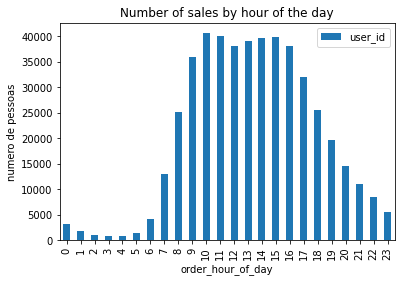

In [37]:
group_orders = df_orders.groupby('order_hour_of_day')['user_id'].count().reset_index()
group_orders.plot(xlabel='order_hour_of_day',
               ylabel= 'numero de pessoas',
               x='order_hour_of_day',
               y='user_id',
                  kind = 'bar', 
               title='Number of sales by hour of the day')

plt.show()

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
<s>O código está com erro nesse trecho. A coluna `Number of unique users` não existe</s>

</div>


O horario com o maior pico de vendas é as 10:00

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
<s>Adicione suas conclusões.</s>

</div>

### [A3] Em que dia da semana as pessoas fazem compras?

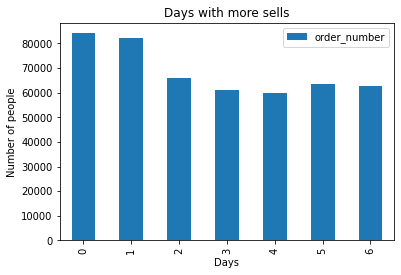

In [38]:
group_orders_2 = df_orders.groupby('order_dow')['order_number'].count().reset_index()
group_orders_2.plot(ylabel='Number of people',
               xlabel= 'Days',
               y='order_number',
               x='order_dow',
               kind = 'bar',
               title='Days with more sells')

plt.show()

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
<s>O código está com erro nesse trecho. A coluna `Number of people` não existe.</s>

</div>


Escreva suas conclusões aqui

 O dia com mais compras é domingo e o com menos compras é a quinta-feira

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
<s>Adicione suas conclusões.</s>

</div>

### [A4] Quanto tempo as pessoas esperam até fazer outro pedido?

Escreva suas conclusões aqui

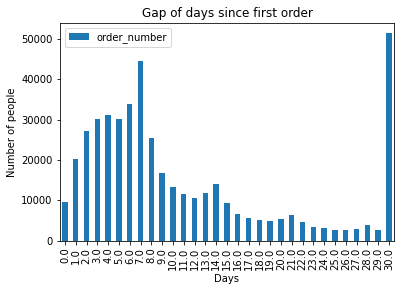

In [39]:
group_orders_3 = df_orders.groupby('days_since_prior_order')['order_number'].count().reset_index()
group_orders_3.plot(ylabel='Number of people',
               xlabel= 'Days',
               y='order_number',
               x='days_since_prior_order',
               kind = 'bar',
               title='Gap of days since first order')

plt.show()

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
<s>Adicione suas conclusões.</s>

</div>

A maior parte das pessoas demora 30 dias para realizar um segundo pedido

# [B] Médio (é necessário concluir tudo para passar)

1.	Há alguma diferença nas distribuições de `'order_hour_of_day'` nas quartas e sábados? Construa gráficos de barras para ambos os dias no mesmo gráfico e descreva as diferenças que você notou.
2.	Construa um gráfico de distribuição para o número de pedidos que os clientes fazem (ou seja, quantos clientes fizeram apenas 1 pedido, quantos fizeram apenas 2, quantos apenas 3, etc.)
3.	Quais são os 20 produtos comprados com mais frequência? Exiba os IDs e nomes.


### [B1] Diferenças nas quartas e sábados em `'order_hour_of_day'`. Crie gráficos de barras para ambos os dias e descreva as diferenças.

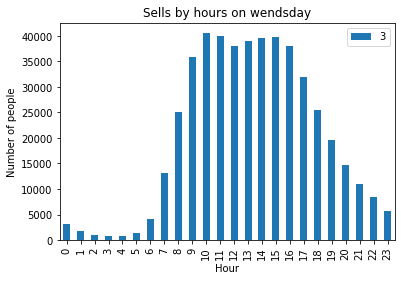

In [40]:
group_orders_4 = df_orders.groupby('order_hour_of_day')['order_dow'] .count().reset_index()
group_orders_4.plot(ylabel='Number of people',
               xlabel= 'Hour',
               y='order_dow',
               x='order_hour_of_day',
               kind = 'bar',
               title='Sells by hours on wendsday')
plt.legend(['3'])
plt.show()

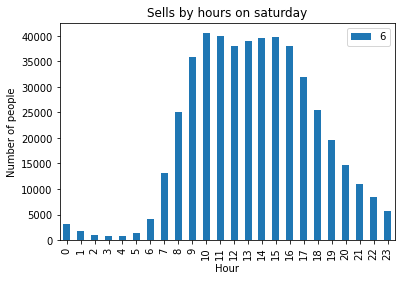

In [41]:
group_orders_4 = df_orders.groupby('order_hour_of_day')['order_dow'] .count().reset_index()
group_orders_4.plot(ylabel='Number of people',
               xlabel= 'Hour',
               y='order_dow',
               x='order_hour_of_day',
               kind = 'bar',
               title='Sells by hours on saturday')
plt.legend(['6'])
plt.show()

Escreva suas conclusões aqui

As vendas começam a aumentar apartir das 7h tanto na quarta-feira quanto no sabado

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
<s>Adicione suas conclusões.</s>

</div>

### [B2] Qual é a distribuição do número de pedidos por cliente?

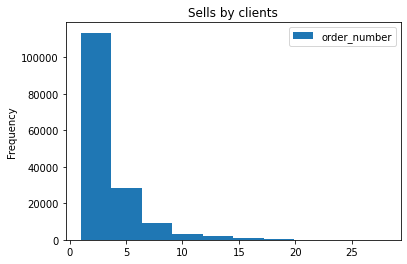

In [64]:
group_orders_5 = df_orders.groupby('user_id')['order_number'] .count().reset_index()
group_orders_5.plot(
               y='order_number',
               x='user_id',
               kind = 'hist',
               title='Sells by clients')

plt.show()

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
<s>Aqui você pode usar um histograma.</s>

</div>

Escreva suas conclusões aqui

A maior parte das pessoas realizou apenas uma compra

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
<s>Adicione suas conclusões.</s>

</div>

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
<s>
Essa conclusão não está correta. A distribuição acima deveria indicar a quantidade de clientes que fizeram diferentes quantidades de pedidos. No eixo `X`, você pode plotar a quantidade de pedidos e a distruição deveria ser a quantidade de pessoas que fez até aquele número de pedidos. Por exemplo: quantas pessoas compraram até 1 vez? Quantas pessoas compraram até 5 vezes? Etc.
</s>
    
</div>

<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
Dica: procure interpretar o histograma como faixa/regiões de valores ao invés de somente pegar valores extremos, pois temos outras estatísticas mais simples que servem para isso.

</div>

### [B3] Quais são os 20 produtos mais populares? Exiba os IDs e nomes.

In [43]:
top20_products = df_order.groupby('product_id').count().sort_values(by= 'order_id', ascending=False).head(20).reset_index()

In [44]:
merged_df = pd.merge(top20_products, df_products, on= 'product_id')
merged_df = merged_df.rename(columns={'order_id': 'frequencia'})

In [45]:
print(merged_df[['product_id', 'product_name', 'frequencia']])

    product_id              product_name  frequencia
0        24852                    Banana       66050
1        13176    Bag of Organic Bananas       53297
2        21137      Organic Strawberries       37039
3        21903      Organic Baby Spinach       33971
4        47209      Organic Hass Avocado       29773
5        47766           Organic Avocado       24689
6        47626               Large Lemon       21495
7        16797              Strawberries       20018
8        26209                     Limes       19690
9        27845        Organic Whole Milk       19600
10       27966       Organic Raspberries       19197
11       22935      Organic Yellow Onion       15898
12       24964            Organic Garlic       15292
13       45007          Organic Zucchini       14584
14       39275       Organic Blueberries       13879
15       49683            Cucumber Kirby       13675
16       28204        Organic Fuji Apple       12544
17        5876             Organic Lemon      

O produto mais popular de todos é a banana

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
<s>Esse trecho de código está com erro.</s>

</div>

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
<s>Adicione suas conclusões.</s>

</div>

# [C] Difícil (é necessário concluir pelo menos duas perguntas para passar)

1.	Quantos itens as pessoas normalmente compram em um pedido? Como fica a distribuição?
2.	Quais são os 20 principais itens incluídos mais frequentemente em pedidos repetidos? Exiba os IDs e nomes.
3.	Para cada produto, qual parcela de seus pedidos são repetidos? Crie uma tabela com colunas de ID e nome do produto e a proporção de pedidos repetidos.
4.	Para cada cliente, qual proporção de todos os seus pedidos são repetidos?
5.	Quais são os 20 principais itens que as pessoas colocam nos carrinhos antes de todos os outros? Exiba o ID do produto, nome e o número de vezes que ele foi o primeiro a ser adicionado a um carrinho.


### [C1] Quantos itens as pessoas normalmente compram em um pedido? Como fica a distribuição?

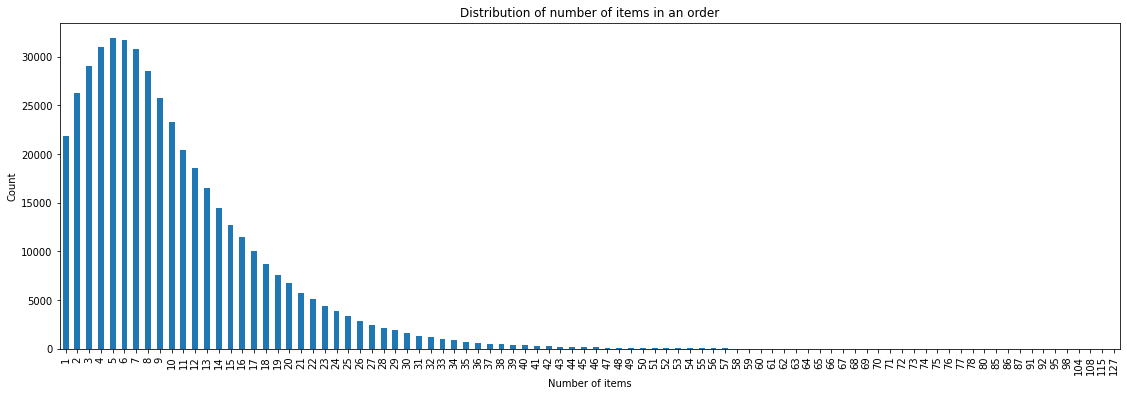

In [55]:
num_items = df_order.groupby('order_id')['product_id'].count()
num_item = num_items.value_counts().sort_index().plot(kind='bar', figsize=(19, 6))
plt.title('Distribution of number of items in an order')
plt.xlabel('Number of items')
plt.ylabel('Count')

plt.show()

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

<s>
Essa distribuição não está correta. Sugestão:

```python
num_items = order_products.groupby('order_id')['product_id'].count()
... = num_items.value_counts().sort_index()
```
</s>
</div>

Escreva suas conclusões aqui

Normalmente apenas 1

### [C2] Quais são os 20 principais itens incluídos mais frequentemente em pedidos repetidos? Exiba os IDs e nomes.

In [63]:
repetidos = df_order[df_order['reordered'] == 1]
repetido = repetidos.merge(df_products, on='product_id')
repetido.groupby(['product_id', 'product_name'])['order_id'].count().sort_values(ascending=False).head(20)

product_id  product_name            
24852       Banana                      55763
13176       Bag of Organic Bananas      44450
21137       Organic Strawberries        28639
21903       Organic Baby Spinach        26233
47209       Organic Hass Avocado        23629
47766       Organic Avocado             18743
27845       Organic Whole Milk          16251
47626       Large Lemon                 15044
27966       Organic Raspberries         14748
16797       Strawberries                13945
26209       Limes                       13327
22935       Organic Yellow Onion        11145
24964       Organic Garlic              10411
45007       Organic Zucchini            10076
49683       Cucumber Kirby               9538
28204       Organic Fuji Apple           8989
8277        Apple Honeycrisp Organic     8836
39275       Organic Blueberries          8799
5876        Organic Lemon                8412
49235       Organic Half & Half          8389
Name: order_id, dtype: int64

<div class="alert alert-block alert-danger">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
<s>O código está com erro nesse trecho.</s>
</div>

A banana é o produto mais frequente em pedidos repetidos

### [C3] Para cada produto, qual parcela de todos os pedidos dele são repetidos?

Escreva suas conclusões aqui

### [C4] Para cada cliente, qual proporção de todos os seus pedidos são repetidos?

Escreva suas conclusões aqui

### [C5] Quais são os 20 principais itens que as pessoas colocam nos carrinhos antes de todos os outros?

Escreva suas conclusões aqui

# Conclusão geral do projeto:

In [ ]:
# NÃO ESTOU SABENDO SE OS CODIGOS QUE EUESREVI ESTAO CERTOS OU PRECISAM DE ALGO A MAIS. 
#PODERIA ME DAR UMA DICA/DIREÇÃO MAIS CONCRETA?
#ESTOU ME SENTINDO MAIS PERDIDO NESSE DO QUE NOS OUTROS

<div class="alert alert-block alert-danger">
<b> Comentário geral do revisor v1</b> <a class="tocSkip"></a>
<s>
Obrigado por enviar o seu projeto e pelo esforço de chegar até aqui. Você está no caminho certo. Esse projeto é desafiador, mas juntos vamos conseguir avançar.

<br>

Deixei alguns comentários em alguns trechos que precisam de ajuste. Peço que trabalhe nesses pontos para avançarmos.
    
<br>    
    
Qualquer dúvida, pode contar comigo.   
    
    
**Até breve!**
</s>
</div>


<div class="alert alert-block alert-danger">
<b> Comentário geral do revisor v2</b> <a class="tocSkip"></a>
<s>
Obrigado por enviar o seu projeto e pelo esforço de chegar até aqui. Você está no caminho certo!

<br>

Deixei alguns comentários em alguns trechos que precisam de ajuste. Dica: verifique se as transformações que você está fazendo realmente estão surtindo efeito. Por exemplo, nas etapas de remover linhas duplicadas e preencher valores ausentes, confirme que isso de fato está ocorrendo. Deixei referências para te ajudar nessa etapa.
    
<br>    
    
Qualquer dúvida, pode contar comigo.   
    
    
**Até breve!**
</s>
</div>

<div class="alert alert-block alert-danger">
<b> Comentário do revisor v3 </b> <a class="tocSkip"></a>
<s>
Obrigado por enviar o seu projeto e pelo esforço para executar as etapas necessárias.   
<br>
    
Essa versão do seu trabalho ficou muio boa. Entretanto, deixei alguns comentários em questões que precisam de pequenos ajustes no código para avançarmos.
    
<br>
    
Se tiver alguma dúvida, pode contar comigo.
    
<br>   

**Até breve!**
</s>
</div>


<div class="alert alert-block alert-danger">
<b> Comentário do revisor v4 </b> <a class="tocSkip"></a>
<s>
Obrigado por enviar o seu projeto e pelo esforço para executar as etapas necessárias.   
<br>
    
Essa versão do seu trabalho ficou muio boa. Entretanto, deixei alguns comentários em questões que precisam de pequenos ajustes no código para avançarmos. Lembre-se: adicione suas conclusões nas etapas intermediárias, sempre que solicitado. Isso nos ajuda a entender a sua forma de interpretar os resultados da análise.
    
<br>
    
Se tiver alguma dúvida, pode contar comigo.
    
<br>   

**Até breve!**
</s>
</div>



<div class="alert alert-block alert-success">
<b> Comentário geral do revisor v5</b> <a class="tocSkip"></a>

Obrigado por enviar o seu projeto e fazer os ajustes sugeridos. Essa versão do seu trabalho ficou muito melhor! Espero que as sugestões sejam relevantes para projetos futuros.
    
<br>
Te desejo uma jornada de muito sucesso e aprendizado.
    
<br>   
    
Qualquer dúvida, pode contar comigo.   
    
<br>  
    
**Até breve!**

</div>


